In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
eta = 0.001

In [57]:
w = np.array([0,1])
v=np.array([1,0])

In [58]:
w

array([0, 1])

In [59]:
v

array([1, 0])

In [60]:
U_0 = 1/np.sqrt(2)*np.array([[1,1],[-1,1]])

In [61]:
M = (w.T).dot(U_0).dot(v)

In [62]:
M

-0.7071067811865475

In [63]:
gradients = np.zeros([2,2])

In [64]:
for i in range(2):
    for j in range(2):
        gradients[i,j] = 2*w[i]*v[j]*M

In [65]:
gradients

array([[-0.        , -0.        ],
       [-1.41421356, -0.        ]])

In [66]:
def projector(U, delta_U):
    M1 = (U.conj().T).dot(delta_U)
    M2 = 0.5*(M1 - M1.conj().T)
    M3 = U.dot(M2)

    return M3

In [67]:
delta_U = -eta*projector(U_0, gradients)

In [68]:
delta_U

array([[ 0.00035355, -0.00035355],
       [ 0.00035355,  0.00035355]])

In [69]:
new_U = U_0 + delta_U

In [70]:
def unitary_test(U):
    return np.max(np.abs(U.conj().T.dot(U)-np.identity(len(U))))

In [71]:
unitary_test(new_U)

2.499999998128999e-07

In [72]:
grad_M = np.outer(w,v)

In [73]:
def matrix_element(U):
    return w.conj().dot(U).dot(v)

In [74]:
def unitarize_matrix(U):
    L,S,R = np.linalg.svd(U)
    return L.dot(R)

In [75]:
def update(U, eta=0.03):
    M = matrix_element(U)
    grad = -2*M*np.conj(grad_M)
    projected_grad = projector(U, grad)
    delta_U = eta*projected_grad
    return U + delta_U

In [76]:
U_0 = 1/np.sqrt(2)*np.array([[1,1],[-1,1]])

In [77]:
def loss(U):
    M = np.abs(matrix_element(U))
    return 1 - M**2

In [78]:
unitary_tol = 0.005

In [79]:
losses = list()
unitary_scores = list()

U = U_0
for i in range(1000):
    U = update(U, 0.01)
    if unitary_test(U) > unitary_tol:
        U = unitarize_matrix(U)
    losses.append(loss(U))
    unitary_scores.append(unitary_test(U))

In [80]:
U

array([[ 1.00125548e+00,  4.23654116e-05],
       [-4.23654116e-05,  1.00125548e+00]])

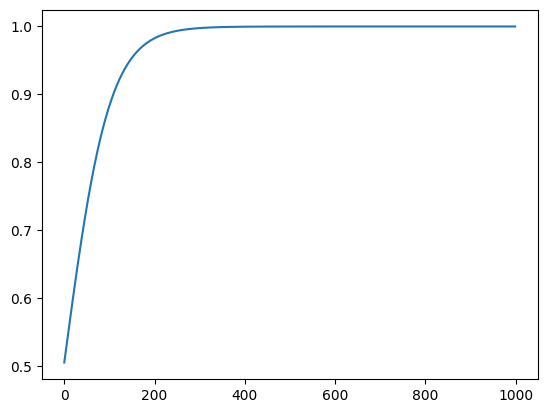

In [81]:
plt.plot(losses)

In [82]:
losses[-1]

0.9999999982051719

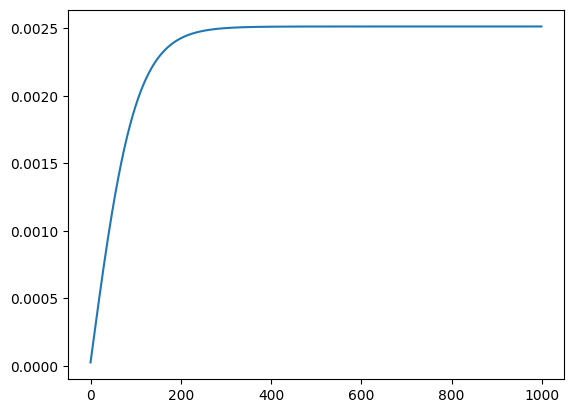

In [83]:
plt.plot(unitary_scores)

## Complex case

In [84]:
w = np.array([1-1j,1+1j])
w /= np.linalg.norm(w)
w

array([0.5-0.5j, 0.5+0.5j])

In [85]:
v = np.array([1+0j, 0+0j])
v

array([1.+0.j, 0.+0.j])

In [86]:
grad_M = np.outer(w.conj(),v)

In [87]:
grad_M

array([[0.5+0.5j, 0. +0.j ],
       [0.5-0.5j, 0. +0.j ]])

In [88]:
U_0 = np.identity(2)

In [89]:
U_0

array([[1., 0.],
       [0., 1.]])

In [90]:
losses = list()
unitary_scores = list()

U = U_0
for i in range(1000):
    U = update(U, 0.01)
    if unitary_test(U) > unitary_tol:
        U = unitarize_matrix(U)
    losses.append(loss(U))
    unitary_scores.append(unitary_test(U))

In [91]:
U_0

array([[1., 0.],
       [0., 1.]])

In [92]:
update(U_0)

array([[1.+0.j   , 0.-0.015j],
       [0.-0.015j, 1.+0.j   ]])

In [93]:
matrix_element(U)

(2.9956869830427557e-05+2.9956869830427557e-05j)

In [94]:
U

array([[0.7080245+0.j        , 0.       -0.70796458j],
       [0.       -0.70796458j, 0.7080245+0.j        ]])

In [95]:
M = matrix_element(U)

In [96]:
M

(2.9956869830427557e-05+2.9956869830427557e-05j)

In [97]:
grad = 2*np.real(grad_M*M)

In [98]:
grad

array([[0.00000000e+00, 0.00000000e+00],
       [5.99137397e-05, 0.00000000e+00]])

In [99]:
projected_grad = projector(U, grad)

In [100]:
projected_grad

array([[ 0.00000000e+00+1.50160687e-05j, -1.50173395e-05+0.00000000e+00j],
       [ 4.50469356e-05+0.00000000e+00j,  0.00000000e+00+1.50160687e-05j]])

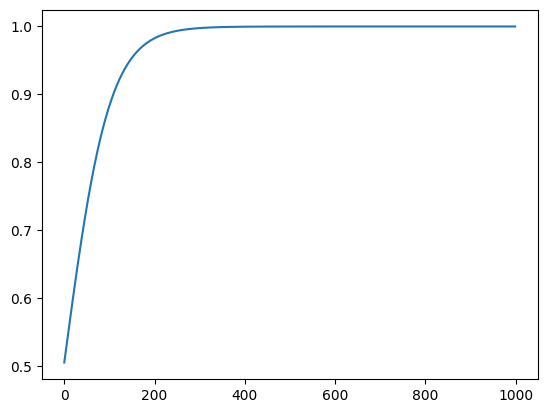

In [101]:
plt.plot(losses)

In [102]:
losses[-1]

0.9999999982051719

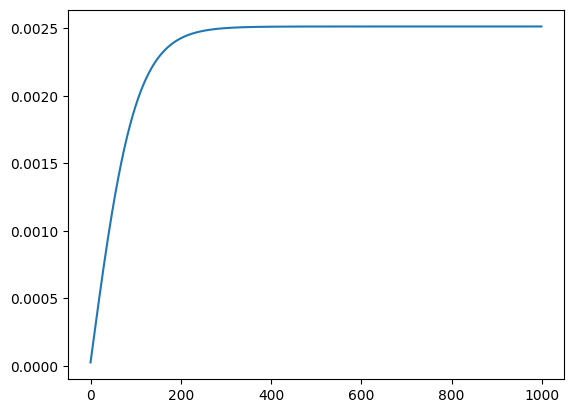

In [103]:
plt.plot(unitary_scores)

In [108]:
U

array([[0.7080245+0.j        , 0.       -0.70796458j],
       [0.       -0.70796458j, 0.7080245+0.j        ]])

In [104]:
unitary_test(U)

0.002512536436097834

In [105]:
unitarize_matrix(U)

array([[0.7071367+0.j        , 0.       -0.70707686j],
       [0.       -0.70707686j, 0.7071367+0.j        ]])

In [106]:
unitary_test(unitarize_matrix(U))

1.1102230246251565e-16

In [107]:
U.dot(v)

array([0.7080245+0.j        , 0.       -0.70796458j])